# Project 2 
## Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

## Success Metric(s):

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

## Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

Note: with help from https://www.kaggle.com/code/niklasdonges/end-to-end-project-with-python

In [178]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


#Cross validation
from sklearn.model_selection import KFold, cross_val_score

#Other
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


# Loading data

In [152]:
og_data = pd.read_csv('term-deposit-marketing-2020.csv')
data = og_data

In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [154]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [155]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [156]:
data.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [157]:
no = data[data['y'] == 'no']
yes = data[data['y'] == 'yes']

print(len(no))
print(len(yes))
print((len(yes)/(len(no)+len(yes)))*100)

37104
2896
7.24


7% of the data set is Y = 'yes'. There are 40'000 entries and 13 features: 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign'

In [158]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0


No null/missing data

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [159]:
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign']

In [160]:
print('age: ', data.age.unique())
print('job: ', data.job.unique())
print('marital: ', data.marital.unique())
print('education: ', data.education.unique())
print('default: ', data.default.unique())
print('balance: ', data.balance.unique())
print('housing: ', data.housing.unique())
print('loan: ', data.loan.unique())
print('contact: ', data.contact.unique())
print('day: ', data.day.unique())
print('month: ', data.month.unique())
print('duration: ', data.duration.unique())
print('campagn: ', data.campaign.unique())
print('y: ', data.y.unique())

age:  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:  ['married' 'single' 'divorced']
education:  ['tertiary' 'secondary' 'unknown' 'primary']
default:  ['no' 'yes']
balance:  [  2143     29      2 ...   7222   3402 102127]
housing:  ['yes' 'no']
loan:  ['no' 'yes']
contact:  ['unknown' 'cellular' 'telephone']
day:  [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration:  [ 261  151   76 ... 1880 1460 2219]
campagn:  [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 

Text(0.5, 1.0, 'Yes')

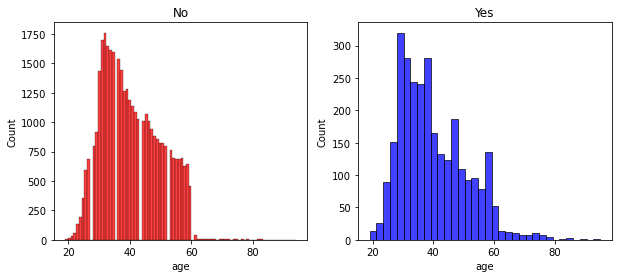

In [161]:
feature = 'age'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes') 

Text(0.5, 1.0, 'Yes')

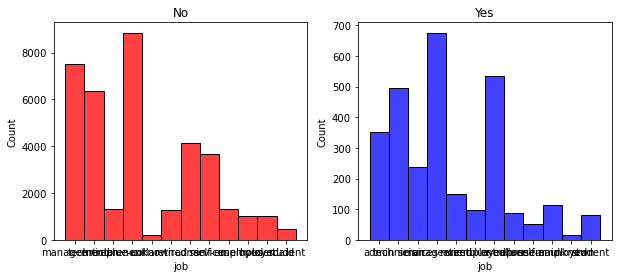

In [61]:
feature = 'job'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

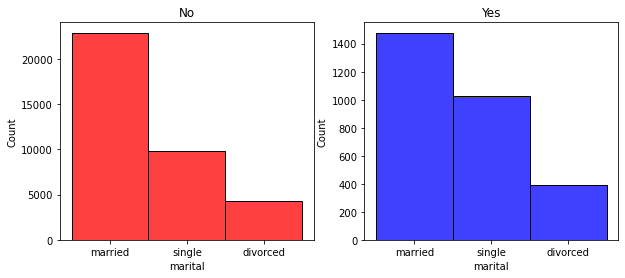

In [60]:
feature = 'marital'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

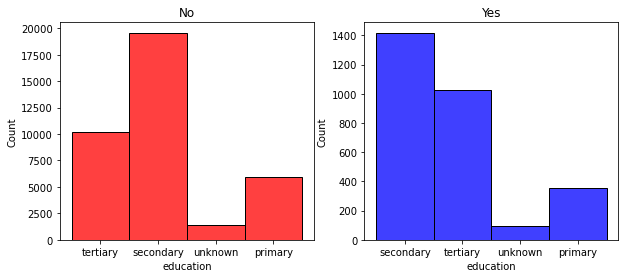

In [59]:
feature = 'education'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

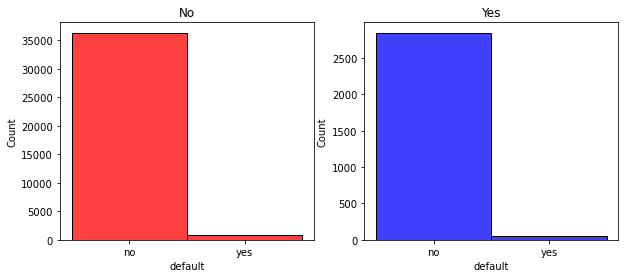

In [58]:
feature = 'default'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

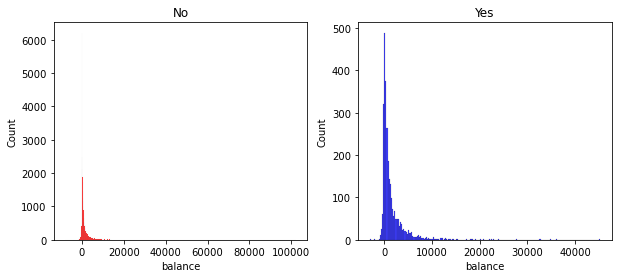

In [56]:
feature = 'balance'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

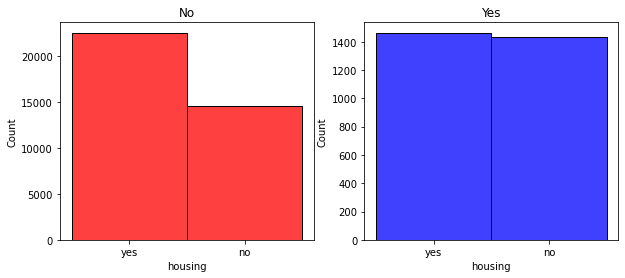

In [57]:
feature = 'housing'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

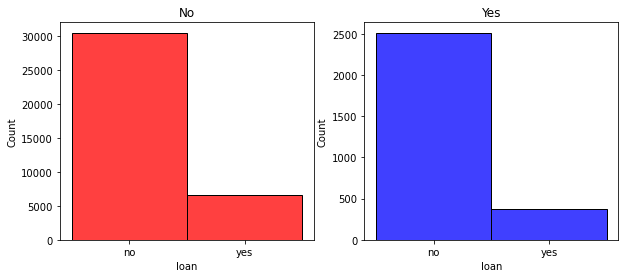

In [63]:
feature = 'loan'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

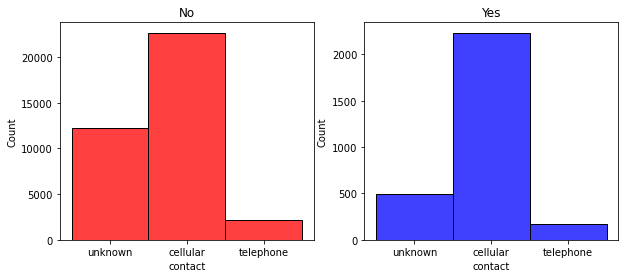

In [64]:
feature = 'contact'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

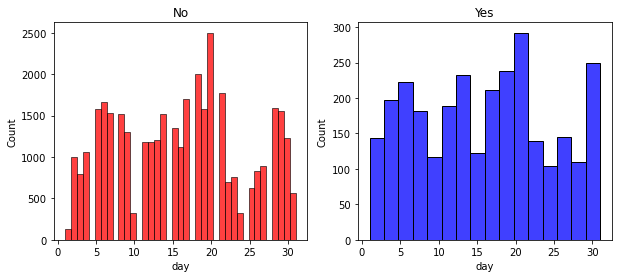

In [65]:
feature = 'day'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

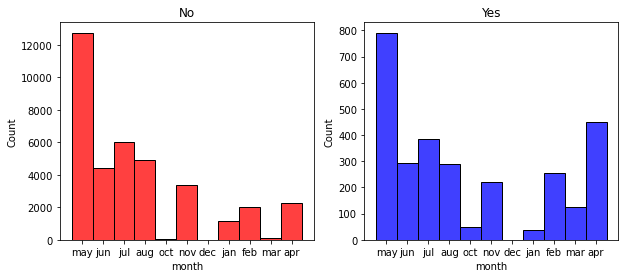

In [66]:
feature = 'month'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

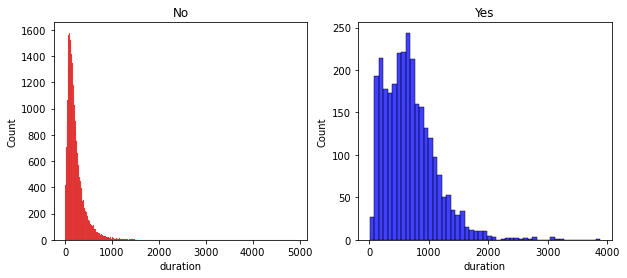

In [67]:
feature = 'duration'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

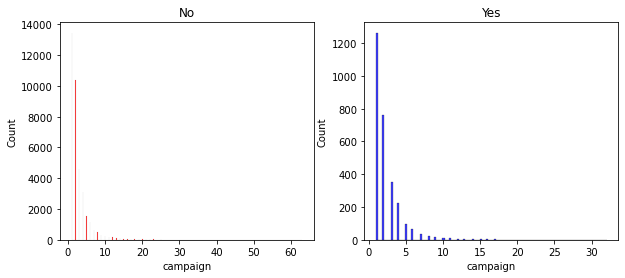

In [68]:
feature = 'campaign'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

# Marital and age

Text(0.5, 1.0, 'Divorced')

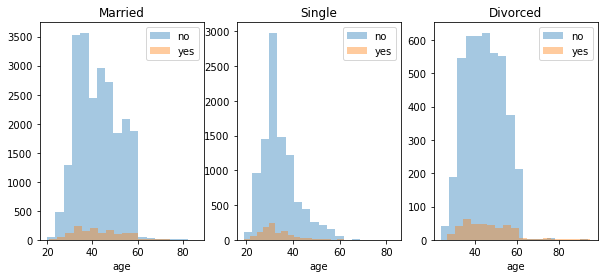

In [39]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))
married = data[data['marital']=='married']
single = data[data['marital']=='single']
divorced = data[data['marital']=='divorced']
ax = sns.distplot(married[married['y']=='no'].age, bins=18, label = 'no', ax = axes[0], kde =False)
ax = sns.distplot(married[married['y']=='yes'].age, bins=18, label = 'yes', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Married')
ax = sns.distplot(single[single['y']=='no'].age, bins=18, label = 'no', ax = axes[1], kde =False)
ax = sns.distplot(single[single['y']=='yes'].age, bins=18, label = 'yes', ax = axes[1], kde =False)
ax.legend()
ax.set_title('Single')
ax = sns.distplot(divorced[divorced['y']=='no'].age, bins=18, label = 'no', ax = axes[2], kde =False)
ax = sns.distplot(divorced[divorced['y']=='yes'].age, bins=18, label = 'yes', ax = axes[2], kde =False)
ax.legend()
ax.set_title('Divorced')

No missing data

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


# Making numerical

In [162]:
#reminder
print('age: ', data.age.unique())
print('job: ', data.job.unique())
print('marital: ', data.marital.unique())
print('education: ', data.education.unique())
print('default: ', data.default.unique())
print('balance: ', data.balance.unique())
print('housing: ', data.housing.unique())
print('loan: ', data.loan.unique())
print('contact: ', data.contact.unique())
print('day: ', data.day.unique())
print('month: ', data.month.unique())
print('duration: ', data.duration.unique())
print('campagn: ', data.campaign.unique())
print('y: ', data.y.unique())

age:  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:  ['married' 'single' 'divorced']
education:  ['tertiary' 'secondary' 'unknown' 'primary']
default:  ['no' 'yes']
balance:  [  2143     29      2 ...   7222   3402 102127]
housing:  ['yes' 'no']
loan:  ['no' 'yes']
contact:  ['unknown' 'cellular' 'telephone']
day:  [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration:  [ 261  151   76 ... 1880 1460 2219]
campagn:  [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 

In [163]:
job = {'management':0, 'technician':1, 'entrepreneur':2, 'blue-collar':3, 'unknown':4,
 'retired':5, 'admin':6,  'services':7,  'self-employed':8,  'unemployed':9, 'housemaid':10,
 'student':11}
marital = {'married':0, 'single':1, 'divorced':2}
education = {'tertiary':0, 'secondary':1, 'unknown':2, 'primary':3}
default = {'no':0, 'yes':1}
housing = {'no':0, 'yes':1}
loan = {'no':0, 'yes':1}
contact = {'unknown':0, 'cellular':1, 'telephone':2}
month = {'jan':1, 'feb':2, 'mar': 3, 'apr':4, 'may': 5, 'jun': 6, 'jul':7, 'aug': 8, 'oct': 10, 'nov':11,'dec':12}
ymap = {'no':0, 'yes':1}

In [164]:
data['job'] = data['job'].map(job)
data['marital'] = data['marital'].map(marital)
data['education'] = data['education'].map(education)
data['default'] = data['default'].map(default)
data['housing'] = data['housing'].map(housing)
data['loan'] = data['loan'].map(loan)
data['contact'] = data['contact'].map(contact)
data['month'] = data['month'].map(month)
data['y'] = data['y'].map(ymap)

In [165]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40000 non-null  int64
 1   job        40000 non-null  int64
 2   marital    40000 non-null  int64
 3   education  40000 non-null  int64
 4   default    40000 non-null  int64
 5   balance    40000 non-null  int64
 6   housing    40000 non-null  int64
 7   loan       40000 non-null  int64
 8   contact    40000 non-null  int64
 9   day        40000 non-null  int64
 10  month      40000 non-null  int64
 11  duration   40000 non-null  int64
 12  campaign   40000 non-null  int64
 13  y          40000 non-null  int64
dtypes: int64(14)
memory usage: 4.3 MB


In [166]:
#checking now
#reminder
print('age: ', data.age.unique())
print('job: ', data.job.unique())
print('marital: ', data.marital.unique())
print('education: ', data.education.unique())
print('default: ', data.default.unique())
print('balance: ', data.balance.unique())
print('housing: ', data.housing.unique())
print('loan: ', data.loan.unique())
print('contact: ', data.contact.unique())
print('day: ', data.day.unique())
print('month: ', data.month.unique())
print('duration: ', data.duration.unique())
print('campagn: ', data.campaign.unique())
print('y: ', data.y.unique())

age:  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
marital:  [0 1 2]
education:  [0 1 2 3]
default:  [0 1]
balance:  [  2143     29      2 ...   7222   3402 102127]
housing:  [1 0]
loan:  [0 1]
contact:  [0 1 2]
day:  [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:  [ 5  6  7  8 10 11 12  1  2  3  4]
duration:  [ 261  151   76 ... 1880 1460 2219]
campagn:  [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
y:  [0 1]


# Feature importance

In [167]:
print(len(data[data.balance <0]))
print(min(data.balance))

3731
-8019


In [168]:
#because there are some negative values, 
#we will temporarily add the min value, 8019, to all balances to calculate chi2
for i in range(len(data.index)):
    data.balance.iloc[i] += 8019
    
print(len(data[data.balance <0]))
print(min(data.balance))

0
0


In [169]:
for feat in feature_cols:
    print(len(data[data[feat] <0]))

0
0
0
0
0
0
0
0
0
0
0
0
0


Make X and y

In [170]:
X = data[feature_cols]
y = data.y 
print(X)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    0        0          0        0    10162        1     0        0   
1       44    1        1          1        0     8048        1     0        0   
2       33    2        0          1        0     8021        1     1        0   
3       47    3        0          2        0     9525        1     0        0   
4       33    4        1          2        0     8020        0     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
39995   53    1        0          0        0     8414        0     0        1   
39996   30    0        1          0        0    11359        0     0        1   
39997   54    6        2          1        0     8219        0     0        1   
39998   34    0        0          0        0     9066        0     0        1   
39999   38    1        0          1        0     9461        1     0        1   

       day  month  duration

In [171]:
#filter features by importance

# Perform feature selection using the chi2 method
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X, y)

# Get the feature importances based on the chi2 scores
scores = selector.scores_

# Create a dataframe with the feature names and their importances
features = X.columns
importances = pd.DataFrame({'Feature': features, 'Importance': scores})

# Sort the dataframe by importance
importances = importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances)

      Feature    Importance
11   duration  2.245727e+06
5     balance  3.316896e+04
12   campaign  2.370594e+02
8     contact  9.106058e+01
2     marital  8.287598e+01
10      month  6.756137e+01
3   education  6.555857e+01
6     housing  4.714734e+01
0         age  3.769258e+01
7        loan  3.184029e+01
9         day  7.052987e+00
4     default  1.686247e+00
1         job  4.923854e-01


In [172]:
#reverse addition
for i in range(len(data.index)):
    data.balance.iloc[i] -= 8019
    
print(len(data[data.balance <0]))
print(min(data.balance))

3731
-8019


# Building ML models

In [173]:
#test different models on data
def compare_models(X_train, X_test, y_train, y_test):
    d = {}
    print('Difference in model accuracy')
    # Create a Logistic Regression classifier
    clf = LogisticRegression(random_state=16)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Logistic regression"
    d[k] =  accuracy
    print(k, accuracy)

    # Create a KNN classifier
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "KNN"
    d[k] =  accuracy
    print(k, accuracy)

    # Create a Decision Tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Decision tree"
    d[k] =  accuracy
    print(k, accuracy)

    # Create a Random Forest classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Random forest"
    d[k] =  accuracy
    print(k, accuracy)

    #Create a Gradient Boosting classifier
    clf = GradientBoostingClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Gradient Boosting"
    d[k] =  accuracy
    print(k, accuracy)

    #Create an XGBoost classifier

    params = {'objective': 'binary:logistic', 'max_depth': 3, 'learning_rate': 0.1}
    clf = xgb.XGBClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "XGBoost"
    d[k] =  accuracy
    print(k, accuracy)
    
    max_k = max(d, key=lambda key: d[key])
    print("Max is", max_k, "with", d[max_k])


In [174]:
#first pass at models
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=16)

In [176]:
print("Original data with 0.2 test size, testing different models")
compare_models(X1_train, X1_test, y1_train, y1_test)

Original data with 0.2 test size, testing different models
Difference in model accuracy


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression 0.930375
KNN 0.9255
Decision tree 0.914125
Random forest 0.9345
Gradient Boosting 0.936625
XGBoost 0.93575
Max is Gradient Boosting with 0.936625


In [96]:
#try scaling data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data[feature_cols])

X2_train, X2_test, y2_train, y2_test = train_test_split(X_scaled, y, test_size=0.2, random_state=16)

In [177]:
print("Scaled data with 0.2 test size")
compare_models(X2_train, X2_test, y2_train, y2_test)

Scaled data with 0.2 test size
Difference in model accuracy


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic regression 0.9312
KNN 0.927
Decision tree 0.9185
Random forest 0.9378
Gradient Boosting 0.9376
XGBoost 0.9356
Max is Random forest with 0.9378


In [182]:
# Create a random forest classifier
clf = RandomForestClassifier()

# Define the number of folds
n_folds = 5

# Create a KFold object with the specified number of folds
kf = KFold(n_splits=n_folds)

# Perform k-fold cross-validation
scores = cross_val_score(clf, X, y, cv=kf)

# Print the average score across all folds
print("Average score: ", np.mean(scores))


Average score:  0.9237500000000001


# Results
First pass shows good prediction accuracy (93.78%)
5fold cross validation on the best algorithm from the first pass (Random forest) gives an average score of 92.37%

## To do

Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

In [ ]:
###### could also try dop features, see previous code